<a href="https://colab.research.google.com/github/katyalrajat/CNN/blob/master/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

## Packages

In [ ]:
# Data packages
import pandas as pd             #always need this one
import numpy as np              #always need this one
import matplotlib.pyplot as plt #make plots
from PIL import Image           # To grab the images and extract useful information
import pickle                   #exporting and importing jars of data
import os                       # To get working directory

# Various scoring metrics from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# What metric will you use?

# Sew those seeds
np.random.seed(42) # Set random seed
RandomState = 42 # Life, the universe and everything

# TensorFlow packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# You will need to import more tf components for sure!

# DATA SOURCES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/AT1B_example/AT1B_example/trn.zip"

In [ ]:
!unzip -q "/content/drive/My Drive/AT1B_example/AT1B_example/tst.zip"

In [ ]:
train_dir = '/content/trn'
test_dir = '/content/tst'

## Instantiate generator

In [ ]:
# Make train generator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', validation_split=0.2) # Making datagen with 20% validation split
# Make test generator
test_datagen = ImageDataGenerator(rescale=1./255)

#batch_size= 20

## Instantiate flows

In [ ]:
# Make trn flow
train_dataflow = train_datagen.flow_from_directory(
    directory= train_dir , #<--Train directory.
    color_mode='rgb',       # RGB Color channel
    class_mode='categorical', batch_size=32,       
    target_size=(80,60),  #<--Force everything to scale to resolution of 80x60.
    subset = "training"
    )


# Make val flow
val_dataflow = train_datagen.flow_from_directory(
   directory= train_dir ,      #<--Train directory.
    color_mode='rgb',         # RGB Color channel
    class_mode='categorical', batch_size=32,       
    target_size=(80,60),  #<--Force everything to scale to resolution of 80x60.
    subset = "validation"
    )


# Make test flow
test_dataflow = test_datagen.flow_from_directory(
     directory = test_dir,          #<--Test directory.
    color_mode='rgb',             # RGB Color channel
    class_mode='categorical', batch_size=32 ,      
    target_size=(80,60),  #<--Force everything to scale to resolution of 80x60.
)


Found 24005 images belonging to 47 classes.
Found 5975 images belonging to 47 classes.
Found 10548 images belonging to 47 classes.


In [ ]:
# Checking if the classes match
if 47 == train_dataflow.class_indices.values().__len__():
    print("Number of class labels match.")
else:
    print("Number of class labels do NOT match. Need to check.")

Number of class labels match.


In [ ]:
# Determine step size
train_stepsize = train_dataflow.n // train_dataflow.batch_size
val_stepsize = val_dataflow.n // val_dataflow.batch_size
test_stepsize = test_dataflow.n // test_dataflow.batch_size

print("Train StepSize: ", train_stepsize)
print("Val StepSize: ", val_stepsize)
print("Test StepSize: ", test_stepsize)

Train StepSize:  750
Val StepSize:  186
Test StepSize:  329


# PART ONE

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

## Build Model

In [ ]:
tf.random.set_seed(168)   # Setting random seed to replicate results
np.random.seed(168)       # Setting random seed to replicate results

In [ ]:
model = tf.keras.Sequential()

In [ ]:
conv_layer1 = Conv2D(128, (3,3), activation='relu', input_shape=(80, 60, 3)) # Input Conv Layer
conv_layer2 = Conv2D(64, (3,3), activation='relu') #2nd conv layer

In [ ]:
fc_layer = Dense(47, activation='softmax') # fully connected layer with output classes = 47

In [ ]:
max_pool = MaxPooling2D(2, 2) # Max pooling layer

In [ ]:
# Setup the model sequentially
model.add(conv_layer1)
model.add(conv_layer2)
model.add(max_pool)
model.add(Flatten())
model.add(fc_layer)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001) # using Adam optimiser

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

In [ ]:
model.summary() # showing model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 58, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 56, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 68096)             0         
_________________________________________________________________
dense (Dense)                (None, 47)                3200559   
Total params: 3,277,935
Trainable params: 3,277,935
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [ ]:
# Train the model
history = model.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 1
                   )

750/750 [==============================] - 62s 83ms/step - loss: 2.2479 - accuracy: 0.3652 - val_loss: 2.1350 - val_accuracy: 0.4148


## Predict & Assess

In [ ]:
# Create prediction
pred = model.predict(test_dataflow )

In [ ]:
pred_test = np.argmax(pred, 1) # predicting the class with the highest score as true or 1 

In [ ]:
tf.math.confusion_matrix(pred_test, test_dataflow.classes , num_classes=47)   #confusion matrix

<tf.Tensor: shape=(47, 47), dtype=int32, numpy=
array([[ 4,  2,  9, ...,  2,  1,  0],
       [ 0,  1,  2, ...,  2,  0,  0],
       [ 6,  4, 16, ...,  2,  0,  1],
       ...,
       [ 1,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)>

In [ ]:
 from sklearn.metrics import classification_report

 print(classification_report(pred_test, test_dataflow.classes, labels=np.unique(pred_test)))           # Running a classification report to check the metrics for each predicted class

              precision    recall  f1-score   support

           0       0.02      0.01      0.02       268
           1       0.01      0.02      0.02        41
           2       0.03      0.05      0.04       340
           3       0.02      0.02      0.02       254
           4       0.06      0.03      0.04       518
           5       0.00      0.00      0.00        36
           6       0.01      0.00      0.01       261
           7       0.01      0.01      0.01       197
           8       0.01      0.02      0.02        47
           9       0.05      0.03      0.03       420
          10       0.05      0.07      0.06       555
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        13
          15       0.06      0.03      0.03       319
          17       0.00      0.00      0.00        35
          18       0.00    

In [ ]:
def get_key(val):                                                       #Function to get value from key - source: https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/
    for key, value in test_dataflow.class_indices.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

In [ ]:
print(get_key(5))                                                        # Testing the list

Accessories_Headwear_Caps


In [ ]:
# print(classification_report(pred_test, test_dataflow.classes, labels= get_key(np.unique(pred_test)))) # Lables not printing, so we will just cross reference the lables disctionary

In [ ]:
test_dataflow.class_indices

{'Accessories_Bags_Backpacks': 0,
 'Accessories_Bags_Clutches': 1,
 'Accessories_Bags_Handbags': 2,
 'Accessories_Belts_Belts': 3,
 'Accessories_Eyewear_Sunglasses': 4,
 'Accessories_Headwear_Caps': 5,
 'Accessories_Jewellery_Earrings': 6,
 'Accessories_Socks_Socks': 7,
 'Accessories_Ties_Ties': 8,
 'Accessories_Wallets_Wallets': 9,
 'Accessories_Watches_Watches': 10,
 'Apparel_Bottomwear_Jeans': 11,
 'Apparel_Bottomwear_Leggings': 12,
 'Apparel_Bottomwear_Shorts': 13,
 'Apparel_Bottomwear_Track Pants': 14,
 'Apparel_Bottomwear_Trousers': 15,
 'Apparel_Dress_Dresses': 16,
 'Apparel_Innerwear_Bra': 17,
 'Apparel_Innerwear_Briefs': 18,
 'Apparel_Innerwear_Innerwear Vests': 19,
 'Apparel_Loungewear and Nightwear_Nightdress': 20,
 'Apparel_Loungewear and Nightwear_Shorts': 21,
 'Apparel_Saree_Sarees': 22,
 'Apparel_Topwear_Belts': 23,
 'Apparel_Topwear_Jackets': 24,
 'Apparel_Topwear_Kurtas': 25,
 'Apparel_Topwear_Kurtis': 26,
 'Apparel_Topwear_Shirts': 27,
 'Apparel_Topwear_Sweaters': 28,

# PART TWO

## Import Model

Let's import a 'raw' model from someone else's hard work. In this instance, the MobileNetV2 model was chosen. I used this model as it seemed to have a higher  accuracy/computation cost.

In [ ]:
# Import
from tensorflow.keras.applications import MobileNetV2 #Loading mobilenetv2


Resizing the images to a square shape [96*96] as that's the minimum input size requirement for MobileNetV2 model and updating the dataflow.

In [ ]:
# Make trn flow
train_dataflow = train_datagen.flow_from_directory(
    directory= train_dir , #<--Train directory.
    color_mode='rgb', 
    class_mode='categorical', batch_size=32,       
    target_size=(96,96),  #<--Force everything to scale to resolution of 80x60.
    subset = "training"
    )

# Check out here for more elements you will want to set. https://keras.io/api/preprocessing/image/
# Advice: Set color_mode, batch_size, class_mode, subset (important!)

# Make val flow
val_dataflow = train_datagen.flow_from_directory(
   directory= train_dir ,      #<--Train directory.
    color_mode='rgb', 
    class_mode='categorical', batch_size=32,       
    target_size=(96,96),  #<--Force everything to scale to resolution of 80x60.
    subset = "validation"
    )

# The subset argument is particularly important here. As well as those noted above. 

# Make test flow
test_dataflow = test_datagen.flow_from_directory(
     directory = test_dir,          #<--Test directory.
    color_mode='rgb', 
    class_mode='categorical', batch_size=32 ,      
    target_size=(96,96),  #<--Force everything to scale to resolution of 80x60.
    shuffle = False
)

# Advice: Also set color_mode, class_mode

Found 24005 images belonging to 47 classes.
Found 5975 images belonging to 47 classes.
Found 10548 images belonging to 47 classes.


In [ ]:
input_shape = (96,96,3)

In [ ]:
# Load model
model_2 = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model_2.trainable = False # Using the predefined weights

In [ ]:
model_2.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

## Adapt to own domain

You will need to adjust the model for your predictive task

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

model_2f = tf.keras.Sequential([
    model_2,
    Flatten(),
    Dense(47, activation='sigmoid')
])

In [ ]:
model_2f.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 47)                541487    
Total params: 2,799,471
Trainable params: 541,487
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Optimiser
optimizer = tf.keras.optimizers.Adam(0.0001)

## Compile

In [ ]:
model_2f.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

## Run & Evaluate

In [ ]:
history = model_2f.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 1
                   )

750/750 [==============================] - 92s 122ms/step - loss: 0.9632 - accuracy: 0.7050 - val_loss: 0.7494 - val_accuracy: 0.7665


In [ ]:
pred_2 = model_2f.predict(test_dataflow ) # Getting predicitons using the model

In [ ]:
pred_2f = np.argmax(pred_2, 1) # predicting the class with the highest score as true or 1 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred_2f, test_dataflow.classes, labels=np.unique(pred_2f)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       196
           1       0.50      0.56      0.53        71
           2       0.92      0.93      0.92       459
           3       0.96      0.99      0.97       208
           4       0.99      0.99      0.99       306
           5       0.86      0.99      0.92        71
           6       0.92      1.00      0.96        93
           7       0.93      0.96      0.94       170
           8       0.99      1.00      0.99        73
           9       0.88      0.80      0.84       261
          10       0.97      0.98      0.97       669
          11       0.61      0.89      0.73       113
          12       0.49      0.84      0.62        31
          13       0.84      0.84      0.84       139
          14       0.41      0.73      0.52        45
          15       0.91      0.55      0.69       233
          16       0.39      0.65      0.49        77
          17       0.92    

# PART THREE

### 3A- MobileNetV2 Extensions

Here we will continue to use the MobileNetV2 model and hypertune it to try and get better results.

In [ ]:
# Load model
model_3 = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

In [ ]:
frozen_layers = 150       # Freezing the intial 150 layers

In [ ]:
# frozen_layers = 130     # Freezing the intial 130 layers

In [ ]:
# frozen_layers = 110     # Freezing the intial 110 layers

In [ ]:
for layer in model_3.layers[:frozen_layers]:          # Freezing the above chosen number of layers 
    layer.trainable = False

In [ ]:
# Build the model
model_3f = tf.keras.Sequential([
    model_3,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
  #  Dense(47, activation='sigmoid')         # Using Sigmoid Classifier for the final output
    Dense(47, activation='softmax')         # Using Softmax Classifier for the final output
])

In [ ]:
model_3f.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5898752   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 47)                12079     
Total params: 8,300,143
Trainable params: 6,762,159
Non-trainable params: 1,537,984
_________________________________________________________________


In [ ]:
# optimizer = tf.keras.optimizers.Adam(0.00001)  # Try different optimiser and learning rates

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)  # Try different optimiser and learning rates

In [ ]:
model_3f.compile(loss='categorical_crossentropy', optimizer= optimizer , metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

In [ ]:
history = model_3f.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 8
                   )

Epoch 1/8
750/750 [==============================] - 93s 124ms/step - loss: 0.8653 - accuracy: 0.7357 - val_loss: 0.7569 - val_accuracy: 0.7592
Epoch 2/8
750/750 [==============================] - 92s 123ms/step - loss: 0.5580 - accuracy: 0.8148 - val_loss: 0.6835 - val_accuracy: 0.7895
Epoch 3/8
750/750 [==============================] - 93s 124ms/step - loss: 0.4902 - accuracy: 0.8272 - val_loss: 0.6295 - val_accuracy: 0.8036
Epoch 4/8
750/750 [==============================] - 92s 123ms/step - loss: 0.4444 - accuracy: 0.8440 - val_loss: 0.6162 - val_accuracy: 0.8100
Epoch 5/8
750/750 [==============================] - 90s 120ms/step - loss: 0.4101 - accuracy: 0.8542 - val_loss: 0.6183 - val_accuracy: 0.8184
Epoch 6/8
750/750 [==============================] - 90s 120ms/step - loss: 0.3819 - accuracy: 0.8646 - val_loss: 0.6221 - val_accuracy: 0.8135
Epoch 7/8
750/750 [==============================] - 90s 120ms/step - loss: 0.3644 - accuracy: 0.8682 - val_loss: 0.6241 - val_accuracy:

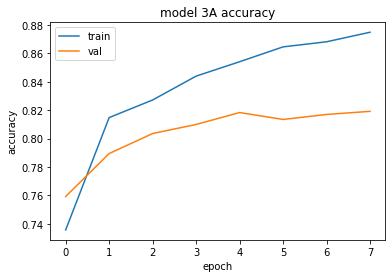

In [ ]:
# PLot the model training
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model 3A accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

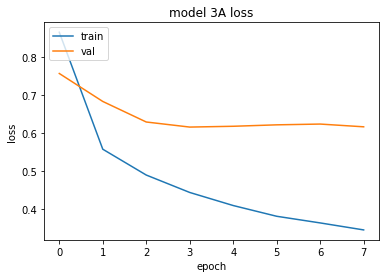

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 3A loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred_3 = model_3f.predict(test_dataflow ) # Getting predicitons using the model
pred_3f = np.argmax(pred_3, 1) # predicting the class with the highest score as true or 1 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred_3f, test_dataflow.classes, labels=np.unique(pred_3f)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       184
           1       0.62      0.83      0.71        60
           2       0.97      0.91      0.94       490
           3       0.97      0.99      0.98       209
           4       1.00      1.00      1.00       306
           5       0.88      1.00      0.93        71
           6       0.95      0.99      0.97        97
           7       1.00      0.95      0.97       184
           8       1.00      1.00      1.00        74
           9       0.95      0.89      0.92       254
          10       0.98      1.00      0.99       668
          11       0.86      0.90      0.88       158
          12       0.51      0.96      0.67        28
          13       0.91      0.88      0.90       144
          14       0.70      0.81      0.75        70
          15       0.92      0.77      0.84       168
          16       0.63      0.71      0.67       114
          17       0.95    

###3B MobileNetV2 Further Experimenting

In [ ]:
from tensorflow.keras.layers import Dropout   # Adding dropout layer to regularise the model

In [ ]:
model_3b = tf.keras.Sequential([
    model_3,
    Dropout(0.3),                            # Dropout layer
    Flatten(),
    Dense(512, activation='relu'),          # Fully Connected layer 1
    Dense(256, activation='relu'),          # Fully COnnected Layer 2
    Dropout(0.3),                            # Dropout Layer
    Dense(128, activation='relu'),            # Fully COnnected Layer 3
  #  Dense(47, activation='sigmoid')         # Using Sigmoid Classifier for the final output
    Dense(47, activation='softmax')         # Using Softmax Classifier for the final output
])

In [ ]:
model_3b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 1280)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               5898752   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [ ]:
optimizer = tf.keras.optimizers.Adamax(0.005)  # Using Adamax optimiser and different learning rates
model_3b.compile(loss='categorical_crossentropy', optimizer= optimizer , metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

In [ ]:
history = model_3b.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 8
                   )

Epoch 1/8
750/750 [==============================] - 91s 122ms/step - loss: 1.2311 - accuracy: 0.6551 - val_loss: 1.0396 - val_accuracy: 0.7056
Epoch 2/8
750/750 [==============================] - 90s 120ms/step - loss: 0.8072 - accuracy: 0.7498 - val_loss: 0.9440 - val_accuracy: 0.7265
Epoch 3/8
750/750 [==============================] - 90s 120ms/step - loss: 0.7027 - accuracy: 0.7784 - val_loss: 0.8390 - val_accuracy: 0.7547
Epoch 4/8
750/750 [==============================] - 91s 121ms/step - loss: 0.6541 - accuracy: 0.7913 - val_loss: 0.8444 - val_accuracy: 0.7572
Epoch 5/8
750/750 [==============================] - 90s 120ms/step - loss: 0.6044 - accuracy: 0.8064 - val_loss: 0.7930 - val_accuracy: 0.7821
Epoch 6/8
750/750 [==============================] - 90s 120ms/step - loss: 0.5741 - accuracy: 0.8141 - val_loss: 0.6908 - val_accuracy: 0.8001
Epoch 7/8
750/750 [==============================] - 90s 120ms/step - loss: 0.5537 - accuracy: 0.8156 - val_loss: 0.7617 - val_accuracy:

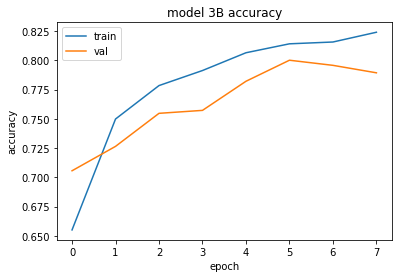

In [ ]:
# PLot the model training History - Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model 3B accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred_3b = model_3b.predict(test_dataflow ) # Getting predicitons using the model
pred_3b = np.argmax(pred_3b, 1) # predicting the class with the highest score as true or 1 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred_3b, test_dataflow.classes, labels=np.unique(pred_3b)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       181
           1       0.51      0.63      0.57        65
           2       0.95      0.93      0.94       476
           3       0.93      1.00      0.96       198
           4       0.99      1.00      0.99       304
           5       0.88      0.91      0.89        78
           6       0.93      0.99      0.96        95
           7       0.94      0.93      0.93       177
           8       1.00      0.96      0.98        77
           9       0.93      0.84      0.88       262
          10       0.99      0.92      0.95       724
          11       0.58      0.95      0.72       100
          12       0.40      1.00      0.57        21
          13       0.91      0.90      0.90       140
          14       0.40      0.74      0.52        43
          15       0.96      0.51      0.67       270
          16       0.35      0.68      0.46        66
          17       0.96    

### 3C - InceptionV3 Extension

In [ ]:
from tensorflow.keras.applications import InceptionV3 #Loading mobilenetv2

In [ ]:
model_inc = InceptionV3(input_shape=input_shape, weights='imagenet', include_top=False)

In [ ]:
model_inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 47, 47, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 47, 47, 32)   96          conv2d_96[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 47, 47, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
frozen_layers = 230       # Freezing the intial 200 layers

In [ ]:
for layer in model_inc.layers[:frozen_layers]:          # Freezing the above chosen number of layers 
   layer.trainable = False

In [ ]:
# model_inc.trainable = False      # Using pre-defined weights to test the model

In [ ]:
model_3c = tf.keras.Sequential([
    model_inc,
    Dropout(0.2),                            # Dropout layer
    Flatten(),
    Dense(512, activation='relu'),          # Fully Connected layer 1
    Dropout(0.2),                            # Dropout layer
    Dense(256, activation='relu'),          # Fully COnnected Layer 2
    Dropout(0.2),                            # Dropout layer
    Dense(128, activation='relu'),            # Fully COnnected Layer 3
  #  Dense(47, activation='sigmoid')         # Using Sigmoid Classifier for the final output
    Dense(47, activation='softmax')         # Using Softmax Classifier for the final output
])

In [ ]:
model_3c.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)             

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0005)  # Using the Adam optimiser with initial learning at 0.0001

In [ ]:
model_3c.compile(loss='categorical_crossentropy', optimizer= optimizer , metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

In [ ]:
history = model_3c.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 10
                   )

Epoch 1/10
750/750 [==============================] - 95s 127ms/step - loss: 1.7853 - accuracy: 0.4989 - val_loss: 1.2731 - val_accuracy: 0.6100
Epoch 2/10
750/750 [==============================] - 95s 126ms/step - loss: 1.2955 - accuracy: 0.6038 - val_loss: 1.1633 - val_accuracy: 0.6329
Epoch 3/10
750/750 [==============================] - 95s 126ms/step - loss: 1.1954 - accuracy: 0.6272 - val_loss: 1.1024 - val_accuracy: 0.6492
Epoch 4/10
750/750 [==============================] - 96s 128ms/step - loss: 1.1277 - accuracy: 0.6471 - val_loss: 1.0799 - val_accuracy: 0.6657
Epoch 5/10
750/750 [==============================] - 95s 127ms/step - loss: 1.0906 - accuracy: 0.6568 - val_loss: 1.0217 - val_accuracy: 0.6851
Epoch 6/10
750/750 [==============================] - 95s 127ms/step - loss: 1.0685 - accuracy: 0.6641 - val_loss: 1.0248 - val_accuracy: 0.6815
Epoch 7/10
750/750 [==============================] - 97s 129ms/step - loss: 1.0405 - accuracy: 0.6692 - val_loss: 1.0136 - val_ac

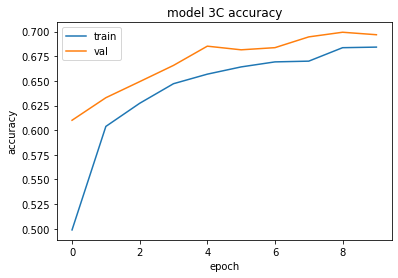

In [ ]:
# PLot the model training History - Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model 3C accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

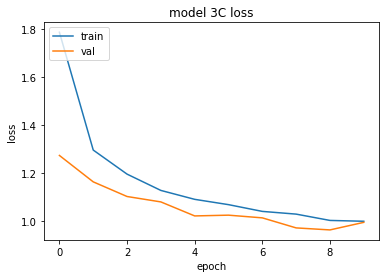

In [ ]:
# PLot the model training History - Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 3C loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred_3c = model_3b.predict(test_dataflow ) # Getting predicitons using the model
pred_3c = np.argmax(pred_3c, 1) # predicting the class with the highest score as true or 1 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred_3c, test_dataflow.classes, labels=np.unique(pred_3c)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       181
           1       0.51      0.63      0.57        65
           2       0.95      0.93      0.94       476
           3       0.93      1.00      0.96       198
           4       0.99      1.00      0.99       304
           5       0.88      0.91      0.89        78
           6       0.93      0.99      0.96        95
           7       0.94      0.93      0.93       177
           8       1.00      0.96      0.98        77
           9       0.93      0.84      0.88       262
          10       0.99      0.92      0.95       724
          11       0.58      0.95      0.72       100
          12       0.40      1.00      0.57        21
          13       0.91      0.90      0.90       140
          14       0.40      0.74      0.52        43
          15       0.96      0.51      0.67       270
          16       0.35      0.68      0.46        66
          17       0.96    

###3D - VGG16 Extension

In [ ]:
from tensorflow.keras.applications import VGG16 #Loading VGG16 model
model_vgg = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [ ]:
#model_vgg.trainable = False

In [ ]:
frozen_layers = 11    

In [ ]:
for layer in model_vgg.layers[:frozen_layers]:          # Freezing the above chosen number of layers 
   layer.trainable = False

In [ ]:
model_3d = tf.keras.Sequential([
    model_vgg,
    Dropout(0.1),                            # Dropout layer
    Flatten(),
    Dense(1028, activation='relu'),          # Fully Connected layer 1
    Dense(256, activation='relu'),          # Fully COnnected Layer 2
    Dropout(0.1),                            # Dropout Layer
    # Dense(128, activation='relu'),            # Fully COnnected Layer 3
    Dense(47, activation='sigmoid')         # Using Sigmoid Classifier for the final output
    #Dense(47, activation='softmax')         # Using Softmax Classifier for the final output
])

In [ ]:
model_3d.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 1028)              4738052   
_________________________________________________________________
dense_59 (Dense)             (None, 256)               263424    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 47)              

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.00001)

In [ ]:
model_3d.compile(loss='categorical_crossentropy', optimizer= optimizer , metrics=['accuracy']) # compiling the model with categorical cross entropy loss funciton

In [ ]:
history = model_3d.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize 
                    ,validation_data=val_dataflow
                    ,validation_steps= val_stepsize 
                    ,epochs= 8
                   )

Epoch 1/8
750/750 [==============================] - 95s 127ms/step - loss: 1.0456 - accuracy: 0.6629 - val_loss: 0.7792 - val_accuracy: 0.7325
Epoch 2/8
750/750 [==============================] - 97s 129ms/step - loss: 0.7056 - accuracy: 0.7611 - val_loss: 0.6457 - val_accuracy: 0.7888
Epoch 3/8
750/750 [==============================] - 97s 130ms/step - loss: 0.5976 - accuracy: 0.7969 - val_loss: 0.6979 - val_accuracy: 0.7888
Epoch 4/8
750/750 [==============================] - 98s 130ms/step - loss: 0.5275 - accuracy: 0.8222 - val_loss: 0.5719 - val_accuracy: 0.8061
Epoch 5/8
750/750 [==============================] - 97s 129ms/step - loss: 0.4743 - accuracy: 0.8362 - val_loss: 0.5580 - val_accuracy: 0.8182
Epoch 6/8
750/750 [==============================] - 96s 128ms/step - loss: 0.4499 - accuracy: 0.8465 - val_loss: 0.5620 - val_accuracy: 0.8214
Epoch 7/8
750/750 [==============================] - 96s 128ms/step - loss: 0.4147 - accuracy: 0.8565 - val_loss: 0.5279 - val_accuracy:

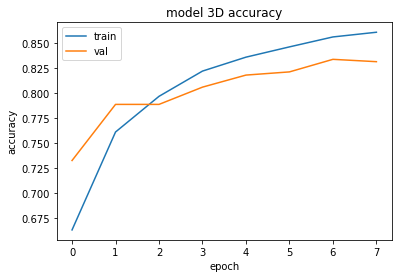

In [ ]:
# PLot the model training History - Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model 3D accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

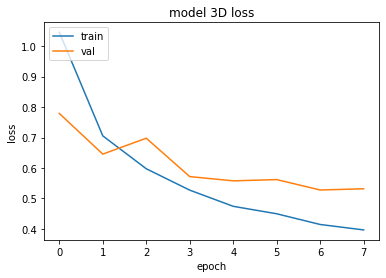

In [ ]:
# PLot the model training History - Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 3D loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred_3d = model_3d.predict(test_dataflow ) # Getting predicitons using the model
pred_3d = np.argmax(pred_3d, 1) # predicting the class with the highest score as true or 1 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(pred_3d, test_dataflow.classes, labels=np.unique(pred_3d)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       184
           1       0.25      0.83      0.38        24
           2       0.95      0.94      0.95       467
           3       0.96      1.00      0.98       206
           4       1.00      1.00      1.00       307
           5       0.91      0.97      0.94        76
           6       1.00      0.96      0.98       105
           7       0.98      0.97      0.97       176
           8       1.00      1.00      1.00        74
           9       0.97      0.79      0.87       290
          10       0.99      0.99      0.99       674
          11       0.93      0.88      0.91       173
          12       0.77      0.89      0.83        46
          13       0.92      0.90      0.91       142
          14       0.91      0.68      0.78       109
          15       0.70      0.96      0.81       104
          16       0.71      0.66      0.69       137
          17       0.94    

### Saving Final Model

In [ ]:
model_3d.save('drive/My Drive/AT1B_final_model') # Save the model

INFO:tensorflow:Assets written to: drive/My Drive/AT1B_final_model/assets


In [ ]:
load_model = tf.keras.models.load_model('drive/My Drive/AT1B_final_model')  # Load to see if it works

In [ ]:
load_model.summary()      # Check Model Summary

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 1028)              4738052   
_________________________________________________________________
dense_59 (Dense)             (None, 256)               263424    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 47)              